# **Covid 19 Case Study**


# Question 1: Data Loading


Q.1: How do you load the COVID-19 datasets for confirmed cases, deaths, and recoveries into Python using Pandas?
________________________________________________________________________________
Solution:
Using Pandas Uploaded the 3 CSV files as DataFrames.

In [1]:
#Initializing Pandas and enabling Uploading of CSV through Google Collab.

from google.colab import files
uploaded = files.upload()
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Loading Datasets

confirmed = pd.read_csv("covid_19_confirmed.csv")
deaths = pd.read_csv("covid_19_deaths.csv")
recovered = pd.read_csv("covid_19_recovered.csv")

Saving covid_19_recovered.csv to covid_19_recovered.csv
Saving covid_19_deaths.csv to covid_19_deaths.csv
Saving covid_19_confirmed.csv to covid_19_confirmed.csv


# Question 2: Data Exploration



Q2.1: After loading the datasets, what is the structure of each dataset in terms of rows, columns, and data types?
________________________________________________________________________________
Solution: Used .info method to get the key characteristics about the dataseets.

In [2]:
#Printing the Heading Followed by running the .info method

print("\n[1] Confirmed Cases Dataset\n")
confirmed.info()

print("\n[2] Deaths Dataset\n")
deaths.info()

print("\n[3] Recovered Cases Dataset\n")
recovered.info()




[1] Confirmed Cases Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB

[2] Deaths Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Columns: 498 entries, Column1 to Column498
dtypes: object(498)
memory usage: 1.1+ MB

[3] Recovered Cases Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Columns: 498 entries, Column1 to Column498
dtypes: object(498)
memory usage: 1019.5+ KB


Q2.2: Generate plots of confirmed cases over time for the top countries.
________________________________________________________________________________
Solution: Firstly sumed up all the confirmed cases and separated identified the top 5 countries.
plotted using Matplotlib



> Faced the first major issue ---  dates formatting. [Fixed it after a lot od debugging] Also seeing the graphs form is a great feeling.



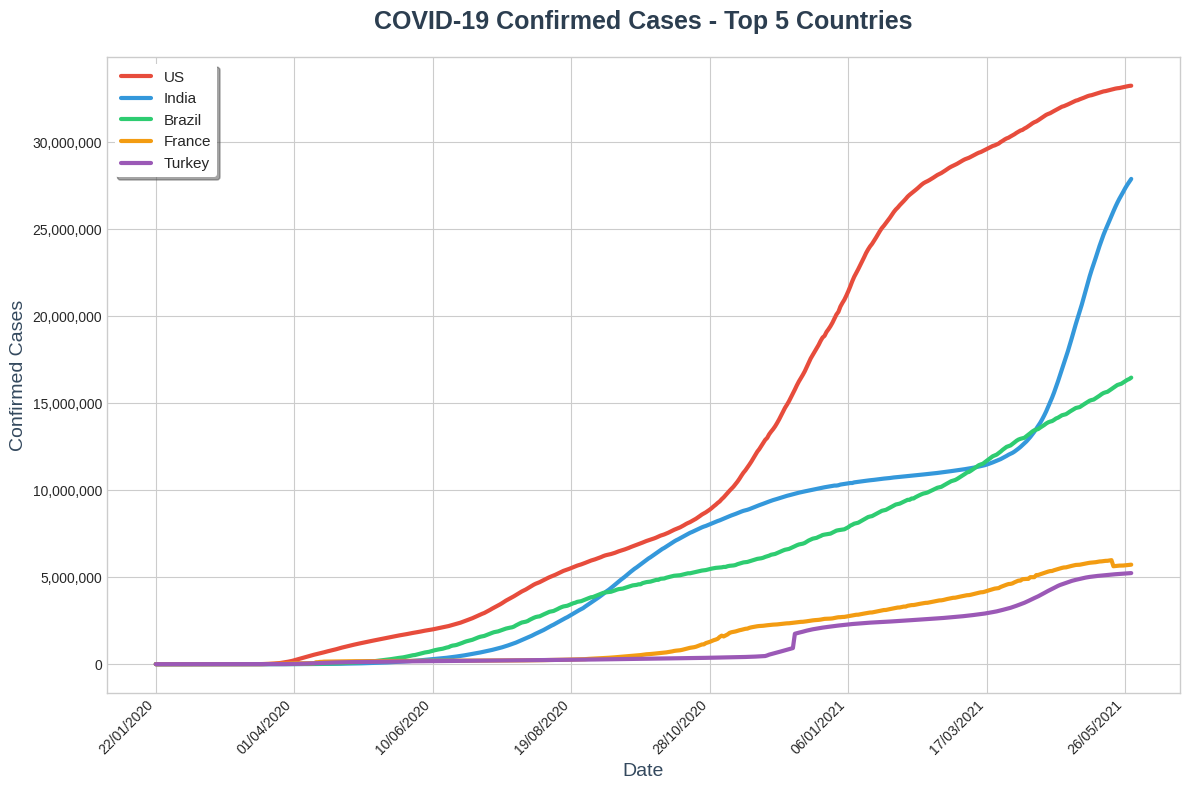

In [3]:
#Getting Matplotlib and setting up of style.
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('seaborn-v0_8-whitegrid')

#Gets the Date from 5th Column
date_columns = confirmed.columns[4:]

#Gets the Top 5 Countries
country_confirmed = confirmed.groupby('Country/Region')[date_columns].sum().max(axis=1)
top_countries = country_confirmed.nlargest(5).index

#Converts dates to dd/mm/yyyy format
formatted_dates = []
for date in date_columns:
    dt = datetime.strptime(date, '%m/%d/%y')
    formatted_dates.append(dt.strftime('%d/%m/%Y'))

#Creating the graph structure
plt.figure(figsize=(12, 8))
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

#Drawing the lines
for i, country in enumerate(top_countries):
    country_data = confirmed[confirmed['Country/Region'] == country][date_columns].sum()
    plt.plot(range(len(country_data)), country_data, color=colors[i], linewidth=3,
             marker='', markersize=3, markerfacecolor=colors[i],
             markeredgecolor='white', markeredgewidth=1, label=country)
#Titles and labels
plt.title('COVID-19 Confirmed Cases - Top 5 Countries', fontsize=18, fontweight='bold',
          pad=20, color='#2c3e50')
plt.xlabel('Date', fontsize=14, color='#34495e')
plt.ylabel('Confirmed Cases', fontsize=14, color='#34495e')

#comma on Y axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

#Date Formatting
selected_indices = range(0, len(formatted_dates), 10)
selected_dates = [formatted_dates[i] for i in selected_indices]
plt.xticks(selected_indices, selected_dates, rotation=45, ha='right')
plt.locator_params(axis='x', nbins=8)
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True,
          facecolor='white', edgecolor='none', fontsize=11)
plt.tight_layout()
plt.show()

Q2.3: Generate plots of confirmed cases over time for China.
________________________________________________________________________________
Solution:
Separated China's Data then created a plot similar to the last question along with a area fill.


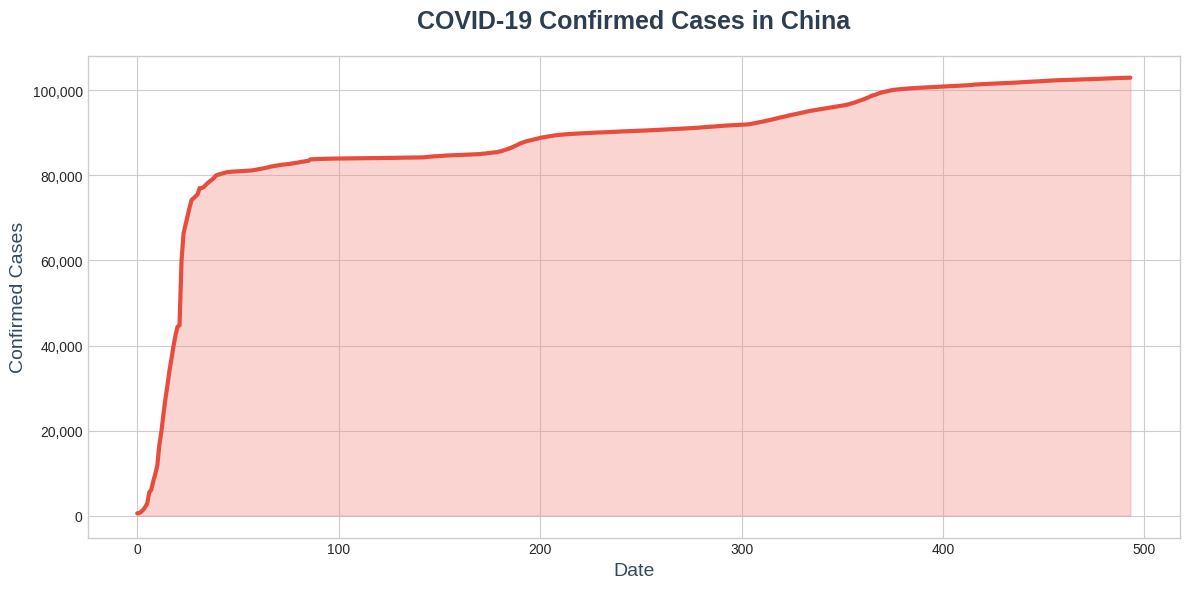

In [4]:
#Getting China's Data
china_data = confirmed[confirmed['Country/Region'] == 'China'][date_columns].sum()

#Creating the graph structure
plt.figure(figsize=(12, 6))

# Main line plot
plt.plot(range(len(china_data)), china_data, color='#e74c3c', linewidth=3,
         marker='', markersize=5, markerfacecolor='#c0392b', markeredgecolor='white', markeredgewidth=1)
plt.fill_between(range(len(china_data)), china_data, alpha=0.4, color='#f1948a')

#Titles and labels
plt.title('COVID-19 Confirmed Cases in China', fontsize=18, fontweight='bold',
          pad=20, color='#2c3e50')
plt.xlabel('Date', fontsize=14, color='#34495e')
plt.ylabel('Confirmed Cases', fontsize=14, color='#34495e')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

# Question 3: Handling Missing Data


Q3.1: Identify these missing values and replace them using a suitable imputation method, such as forward filling, for time-series data.
________________________________________________________________________________
Solution: Used .isnull to find the missing values followed by using .ffill to fill out the missing data.

In [5]:
#Prints out the Missing Data.
print("Missing values in Confirmed Cases:")
print(confirmed.isnull().sum())
print("\nMissing values in Deaths:")
print(deaths.isnull().sum())
print("\nMissing values in Recovered:")
print(recovered.isnull().sum())

#Forward Fill to fill out the missng data.
confirmed = confirmed.ffill()
deaths = deaths.ffill()
recovered = recovered.ffill()
#Testing
display(confirmed)

Missing values in Confirmed Cases:
Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64

Missing values in Deaths:
Column1      190
Column2        0
Column3        2
Column4        2
Column5        0
            ... 
Column494      0
Column495      0
Column496      0
Column497      0
Column498      0
Length: 498, dtype: int64

Missing values in Recovered:
Column1      191
Column2        0
Column3        1
Column4        1
Column5        0
            ... 
Column494      0
Column495      0
Column496      0
Column497      0
Column498      0
Length: 498, dtype: int64


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Turks and Caicos Islands,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,Turks and Caicos Islands,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,Turks and Caicos Islands,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,Turks and Caicos Islands,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92754,92920,93106,93201,93279,93428,93627,93947,94430,94751


#Question 4: Data Cleaning and Preparation




Q4.1: Replace blank values in the province column with “All Provinces.”
________________________________________________________________________________
Solution:
   Ran a simple for loop using .ffill to fill the missing value in Province/State.
> I was about to quit due to this question the deaths and recovered csv files had a extra column which lead to this throwing key error, spent almost a day debugging this eventually realised my mistake after opening the files in trusty old excel :)


In [6]:
confirmed = pd.read_csv("covid_19_confirmed.csv")
#Removing the the first extra column in these two files.
deaths = pd.read_csv("covid_19_deaths.csv",
    skiprows=lambda x: x in [0])
recovered = pd.read_csv("covid_19_recovered.csv",
    skiprows=lambda x: x in [0])

#Filling missing values in 'Province/State' with 'All Provinces'
for df in [confirmed, deaths, recovered]:
    df['Province/State'] = df['Province/State'].fillna('All Provinces')
#Using Display to Check for if it worked
display(confirmed)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All Provinces,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,All Provinces,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,All Provinces,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,All Provinces,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,All Provinces,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,All Provinces,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,All Provinces,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,All Provinces,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,All Provinces,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92754,92920,93106,93201,93279,93428,93627,93947,94430,94751


# Question 5: Independent Dataset Analysis


Q5.1: Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?
________________________________________________________________________________
Solution: One of the most complex graphs I worked on had to reitrate quite a few times to get the desired result.
Calculated the daily cases using diff. then removed the negative values as they practically made the graph unreadable, found the peaks and their dates followed by plotting the graph.



Germany: 49,044 on 12/30/20
France: 117,900 on 4/11/21
Italy: 40,902 on 11/13/20

France had the highest single-day surge of 117,900 on 4/11/21


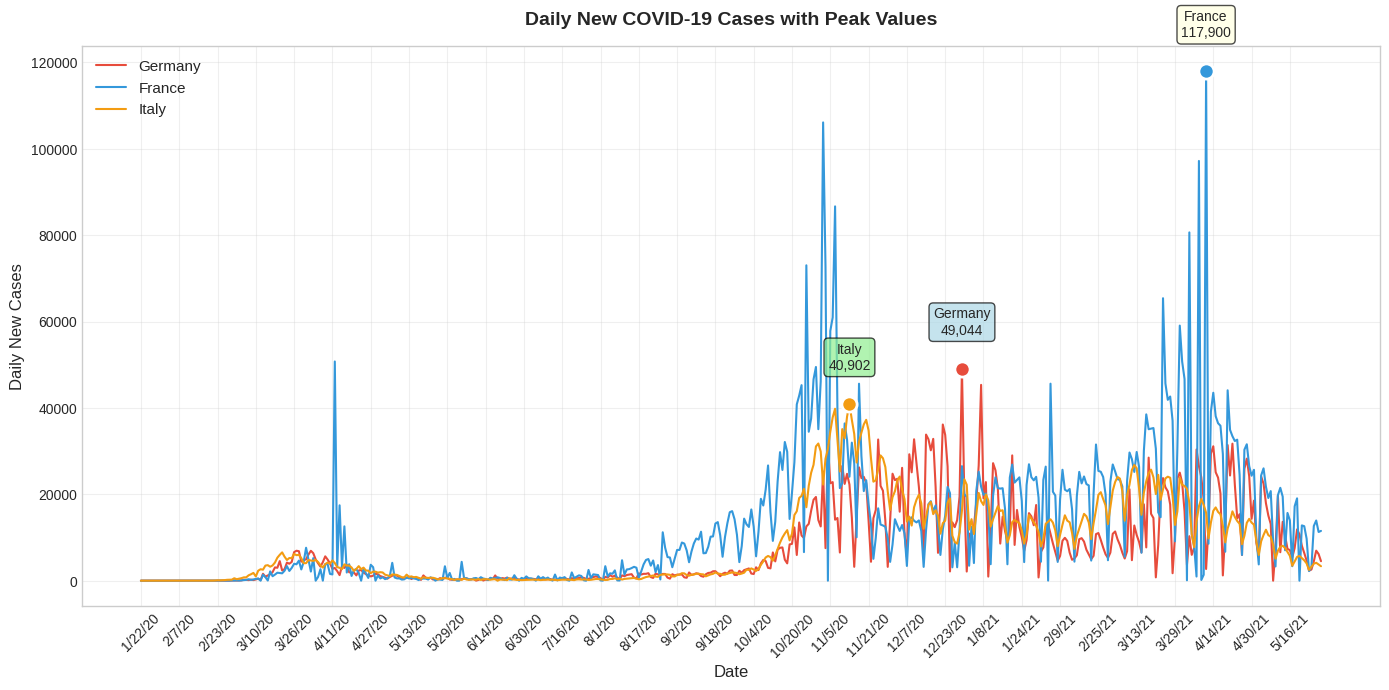

In [7]:

#Calculate daily new cases using .diff to take the difference between two consecutive elements
def daily_new_cases(df, country):
    country_data = df[df['Country/Region'] == country][date_columns].sum()
    return country_data.diff().fillna(0)

germany_new = daily_new_cases(confirmed, 'Germany')
france_new = daily_new_cases(confirmed, 'France')
italy_new = daily_new_cases(confirmed, 'Italy')

#Removing negative values as they are skewwing the graph
germany_new = germany_new.clip(lower=0)
france_new = france_new.clip(lower=0)
italy_new = italy_new.clip(lower=0)

#Find peaks
peak_germany = germany_new.max()
peak_france = france_new.max()
peak_italy = italy_new.max()

date_germany = germany_new.idxmax()
date_france = france_new.idxmax()
date_italy = italy_new.idxmax()

# Print results
print(f"Germany: {peak_germany:,.0f} on {date_germany}")
print(f"France: {peak_france:,.0f} on {date_france}")
print(f"Italy: {peak_italy:,.0f} on {date_italy}")

# Find highest surge
highest = max(peak_germany, peak_france, peak_italy)
if highest == peak_germany:
    print(f"\nGermany had the highest single-day surge of {highest:,.0f} on {date_germany}")
elif highest == peak_france:
    print(f"\nFrance had the highest single-day surge of {highest:,.0f} on {date_france}")
else:
    print(f"\nItaly had the highest single-day surge of {highest:,.0f} on {date_italy}")

# Simple plot
plt.figure(figsize=(14, 7))

# Plot lines
plt.plot(germany_new.index, germany_new.values, label='Germany', color='#e74c3c', linewidth=1.5)
plt.plot(france_new.index, france_new.values, label='France', color='#3498db', linewidth=1.5)
plt.plot(italy_new.index, italy_new.values, label='Italy', color='#f39c12', linewidth=1.5)

# Mark peaks
plt.scatter(date_germany, peak_germany, color='#e74c3c', s=120, zorder=5, edgecolor='white', linewidth=2)
plt.scatter(date_france, peak_france, color='#3498db', s=120, zorder=5, edgecolor='white', linewidth=2)
plt.scatter(date_italy, peak_italy, color='#f39c12', s=120, zorder=5, edgecolor='white', linewidth=2)

# Add peak labels with better positioning
plt.text(date_germany, peak_germany + 8000, f'Germany\n{peak_germany:,.0f}', ha='center', fontsize=10,
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
plt.text(date_france, peak_france + 8000, f'France\n{peak_france:,.0f}', ha='center', fontsize=10,
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.7))
plt.text(date_italy, peak_italy + 8000, f'Italy\n{peak_italy:,.0f}', ha='center', fontsize=10,
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7))

# Format plot
plt.title('Daily New COVID-19 Cases with Peak Values', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily New Cases', fontsize=12)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)


n_ticks = len(germany_new.index) // 30
plt.xticks(germany_new.index[::n_ticks], rotation=45)
plt.tight_layout()
plt.show()

Q5.2: Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the pandemic according to this metric?
________________________________________________________________________________
Solution:

Separated the two countries data for that particular date by a custom func get_data followed by calculating the recovery rate.

In [8]:
date = '12/31/20'

def get_data(df, country, date):
    return df[df['Country/Region'] == country][date].sum()
#Getting individual data.
canada_confirmed = get_data(confirmed, 'Canada', date)
canada_recovered = get_data(recovered, 'Canada', date)
australia_confirmed = get_data(confirmed, 'Australia', date)
australia_recovered = get_data(recovered, 'Australia', date)
#Calculationg the recovery Rate
recovery_rate_canada = canada_recovered / canada_confirmed if canada_confirmed > 0 else 0
recovery_rate_australia = australia_recovered / australia_confirmed if australia_confirmed > 0 else 0

#Printing the Recovery Rate.
print(f"Recovery rate for Canada: {recovery_rate_canada:.2%}")
print(f"Recovery rate for Australia: {recovery_rate_australia:.2%}")

if recovery_rate_canada > recovery_rate_australia:
    print("Canada showed better management.")
else:
    print("Australia showed better management.")

Recovery rate for Canada: 84.47%
Recovery rate for Australia: 79.38%
Canada showed better management.


Q5.3: What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death rate as of the latest data point
________________________________________________________________________________




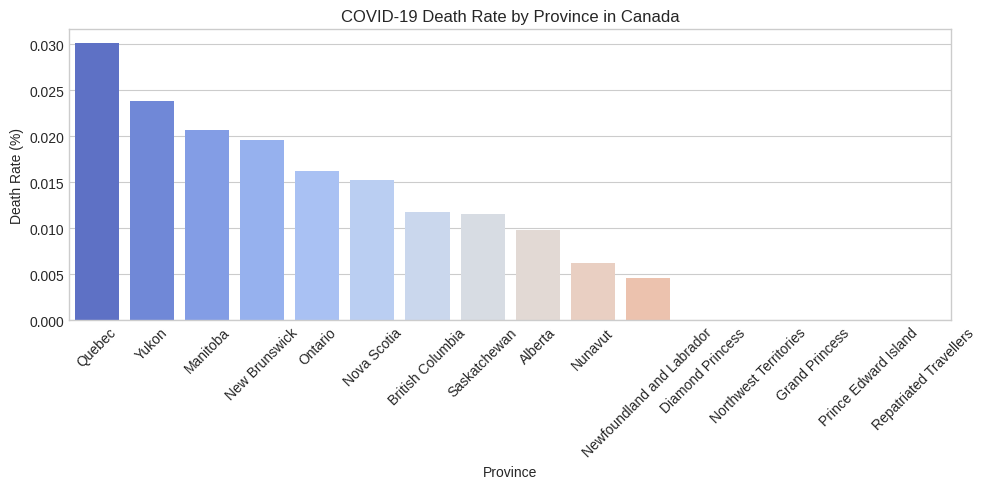

Death rate distribution by province:
                 Province Death Rate
                   Quebec      3.01%
                    Yukon      2.38%
                 Manitoba      2.07%
            New Brunswick      1.96%
                  Ontario      1.62%
              Nova Scotia      1.52%
         British Columbia      1.18%
             Saskatchewan      1.16%
                  Alberta      0.98%
                  Nunavut      0.62%
Newfoundland and Labrador      0.46%
         Diamond Princess      0.00%
    Northwest Territories      0.00%
           Grand Princess      0.00%
     Prince Edward Island      0.00%
   Repatriated Travellers      0.00%

Province with highest death rate: Quebec (3.01%)
Province with lowest death rate: Repatriated Travellers (0.00%)


In [9]:
import seaborn as sns

#Get the latest date column
latest_date = confirmed.columns[-1]

#Filter Canada data
canada_confirmed = confirmed[confirmed['Country/Region'] == 'Canada']
canada_deaths = deaths[deaths['Country/Region'] == 'Canada']

#Calculate death rates by provnce
death_data = []

for province in canada_confirmed['Province/State'].unique():
    confirmed_cases = canada_confirmed[canada_confirmed['Province/State'] == province][latest_date].sum()
    death_cases = canada_deaths[canada_deaths['Province/State'] == province][latest_date].sum()

    death_rate = death_cases / confirmed_cases if confirmed_cases > 0 else 0
    death_data.append({'Province': province or 'Unknown', 'Death Rate': death_rate})

#Convert to DataFrame and sort
death_df = pd.DataFrame(death_data).sort_values(by='Death Rate', ascending=False)

#Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Province', y='Death Rate', data=death_df, hue='Province', palette='coolwarm', legend=False)
plt.title('COVID-19 Death Rate by Province in Canada')
plt.ylabel('Death Rate (%)')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Print summary table
print("Death rate distribution by province:")
print(death_df.to_string(index=False, formatters={'Death Rate': '{:.2%}'.format}))

#Identify highest and lowest
highest = death_df.iloc[0]
lowest = death_df.iloc[-1]
print(f"\nProvince with highest death rate: {highest['Province']} ({highest['Death Rate']:.2%})")
print(f"Province with lowest death rate: {lowest['Province']} ({lowest['Death Rate']:.2%})")

# Question 6: Data Transformation

Q6.1: Transform the 'deaths' dataset from wide format (where each column represents a date) to long format, where each row represents a single date, ensuring that the date column is in datetime format. How would this transformation be executed?

Solution:

Utilized .melt to turn the wide form to the long form

In [10]:
deaths_long = deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                          var_name='Date', value_name='Deaths')
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'], format='%m/%d/%y')
print(deaths_long.head())

  Province/State Country/Region       Lat       Long       Date  Deaths
0  All Provinces    Afghanistan  33.93911  67.709953 2020-01-22     0.0
1  All Provinces        Albania  41.15330  20.168300 2020-01-22     0.0
2  All Provinces        Algeria  28.03390   1.659600 2020-01-22     0.0
3  All Provinces        Andorra  42.50630   1.521800 2020-01-22     0.0
4  All Provinces         Angola -11.20270  17.873900 2020-01-22     0.0


Q6.2: What is the total number of deaths reported per country up to the current date?
________________________________________________________________________________
Solution:

Was able to print the table on my own `(Using this total_deaths = deaths_long.groupby('Country/Region')['Deaths'].sum())`
but really had a hard time figuring out how to represent it, took help from ChatGPT for figuring out the visualization.


In [11]:
import plotly.express as px

#Gets total deaths per country
total_deaths = deaths_long.groupby('Country/Region')['Deaths'].sum()

#Creating a new dataframe
total_deaths_df = total_deaths.reset_index()

#Using Choropleth Map
fig = px.choropleth(
    total_deaths_df,
    locations='Country/Region',
    locationmode='country names',
    color='Deaths',
    hover_name='Country/Region',
    color_continuous_scale='Reds',
    title='Total Deaths by Country'
)

fig.show()


Q6.3: What are the top 5 countries with the highest average daily deaths?


In [12]:
#Utilizing the deaths_Long from the 6th questin
deaths_long = deaths_long.sort_values(['Country/Region', 'Date'])
deaths_long['Daily Deaths'] = deaths_long.groupby('Country/Region')['Deaths'].diff().fillna(0)

#finding the mean and sorting the countries
avg_daily_deaths = deaths_long.groupby('Country/Region')['Daily Deaths'].mean()
top_5_avg_deaths = avg_daily_deaths.nlargest(5)
display(top_5_avg_deaths)

,Daily Deaths
Country/Region,
US,1203.048583
Brazil,933.313765
India,659.862348
Mexico,452.338057
Italy,255.064777


Q6.4: How have the total deaths evolved over time in the United States?
________________________________________________________________________________
Solution:
Plotted it very similar to the earlier graph plot, by filtering us data and summing deaths every unique day reaching to the total deaths.

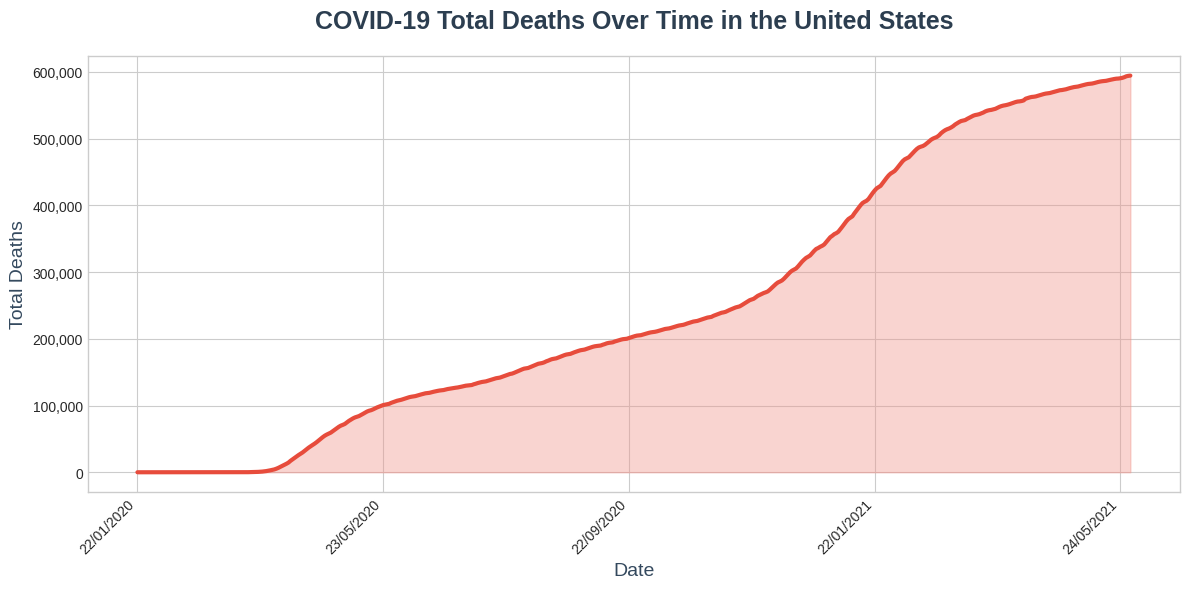

In [13]:
from datetime import datetime

plt.style.use('seaborn-v0_8-whitegrid')

deaths_long = deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                          var_name='Date', value_name='Deaths')
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'], format='%m/%d/%y')

#Filter for US data
us_deaths = deaths_long[deaths_long['Country/Region'] == 'US']

#Sort by date and get unique dates with total deats
us_deaths_grouped = us_deaths.groupby('Date')['Deaths'].sum().reset_index()
us_deaths_grouped = us_deaths_grouped.sort_values('Date')


formatted_dates = []
for date in us_deaths_grouped['Date']:
    formatted_dates.append(date.strftime('%d/%m/%Y'))

plt.figure(figsize=(12, 6))

# Main line plot
plt.plot(range(len(us_deaths_grouped)), us_deaths_grouped['Deaths'],
         color='#e74c3c', linewidth=3,
         marker='', markersize=5, markerfacecolor='#c0392b',
         markeredgecolor='white', markeredgewidth=1)

plt.fill_between(range(len(us_deaths_grouped)), us_deaths_grouped['Deaths'],
                 alpha=0.4, color='#f1948a')

#Titles and labels
plt.title('COVID-19 Total Deaths Over Time in the United States', fontsize=18, fontweight='bold',
          pad=20, color='#2c3e50')
plt.xlabel('Date', fontsize=14, color='#34495e')
plt.ylabel('Total Deaths', fontsize=14, color='#34495e')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

#Date formatting
selected_indices = range(0, len(formatted_dates), len(formatted_dates)//8)
selected_dates = [formatted_dates[i] for i in selected_indices if i < len(formatted_dates)]
plt.xticks(selected_indices[:len(selected_dates)], selected_dates, rotation=45, ha='right')
plt.locator_params(axis='x', nbins=8)

plt.tight_layout()
plt.show()

# Question 7: Data Merging


Q7.1: How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a comprehensive view of the pandemic's impact?

In [14]:
#Utilizing .melt to transform confirmed and deaths to long form as well
confirmed_long = confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                var_name='Date', value_name='Confirmed')
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'], format='%m/%d/%y')

recovered_long = recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                                var_name='Date', value_name='Recovered')
recovered_long['Date'] = pd.to_datetime(recovered_long['Date'], format='%m/%d/%y')

#Creating a new Merged DataFrame Combinin the 3 data sets
merged = pd.merge(confirmed_long, deaths_long, on=['Country/Region', 'Date'], suffixes=('_conf', '_deaths'))
merged = pd.merge(merged, recovered_long, on=['Country/Region', 'Date'])
merged = merged[['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']]
display(merged)


,Country/Region,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0.0,0.0
1,Albania,2020-01-22,0,0.0,0.0
2,Algeria,2020-01-22,0,0.0,0.0
3,Andorra,2020-01-22,0,0.0,0.0
4,Angola,2020-01-22,0,0.0,0.0
...,...,...,...,...,...
21669799,Vietnam,2021-05-29,6908,47.0,2896.0
21669800,West Bank and Gaza,2021-05-29,307838,3492.0,300524.0
21669801,Yemen,2021-05-29,6731,1319.0,3399.0
21669802,Zambia,2021-05-29,94751,1276.0,91594.0


Q7.2: Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]

In [15]:
#selecting required columns
merged = merged[['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']]

#Creating month from date
merged['Month'] = merged['Date'].dt.to_period('M')

#converting to a numberic valuse
for col in ['Confirmed', 'Deaths', 'Recovered']:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

#managing NaN values
merged.dropna(subset=['Confirmed', 'Deaths', 'Recovered'], inplace=True)

#Grouping data by country
monthly_data = merged.groupby(['Country/Region', 'Month'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

display(monthly_data)

,Country/Region,Month,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01,0,0.0,0.0
1,Afghanistan,2020-02,6,0.0,0.0
2,Afghanistan,2020-03,1164,27.0,26.0
3,Afghanistan,2020-04,27074,890.0,2927.0
4,Afghanistan,2020-05,225674,5007.0,24129.0
...,...,...,...,...,...
3276,Zimbabwe,2021-01,787416,23012.0,531530.0
3277,Zimbabwe,2021-02,984049,38753.0,849842.0
3278,Zimbabwe,2021-03,1132264,46556.0,1056857.0
3279,Zimbabwe,2021-04,1126565,46375.0,1050250.0


Q7.3: Redo the analysis in Question 7.2 for the United States, Italy, and Brazil.



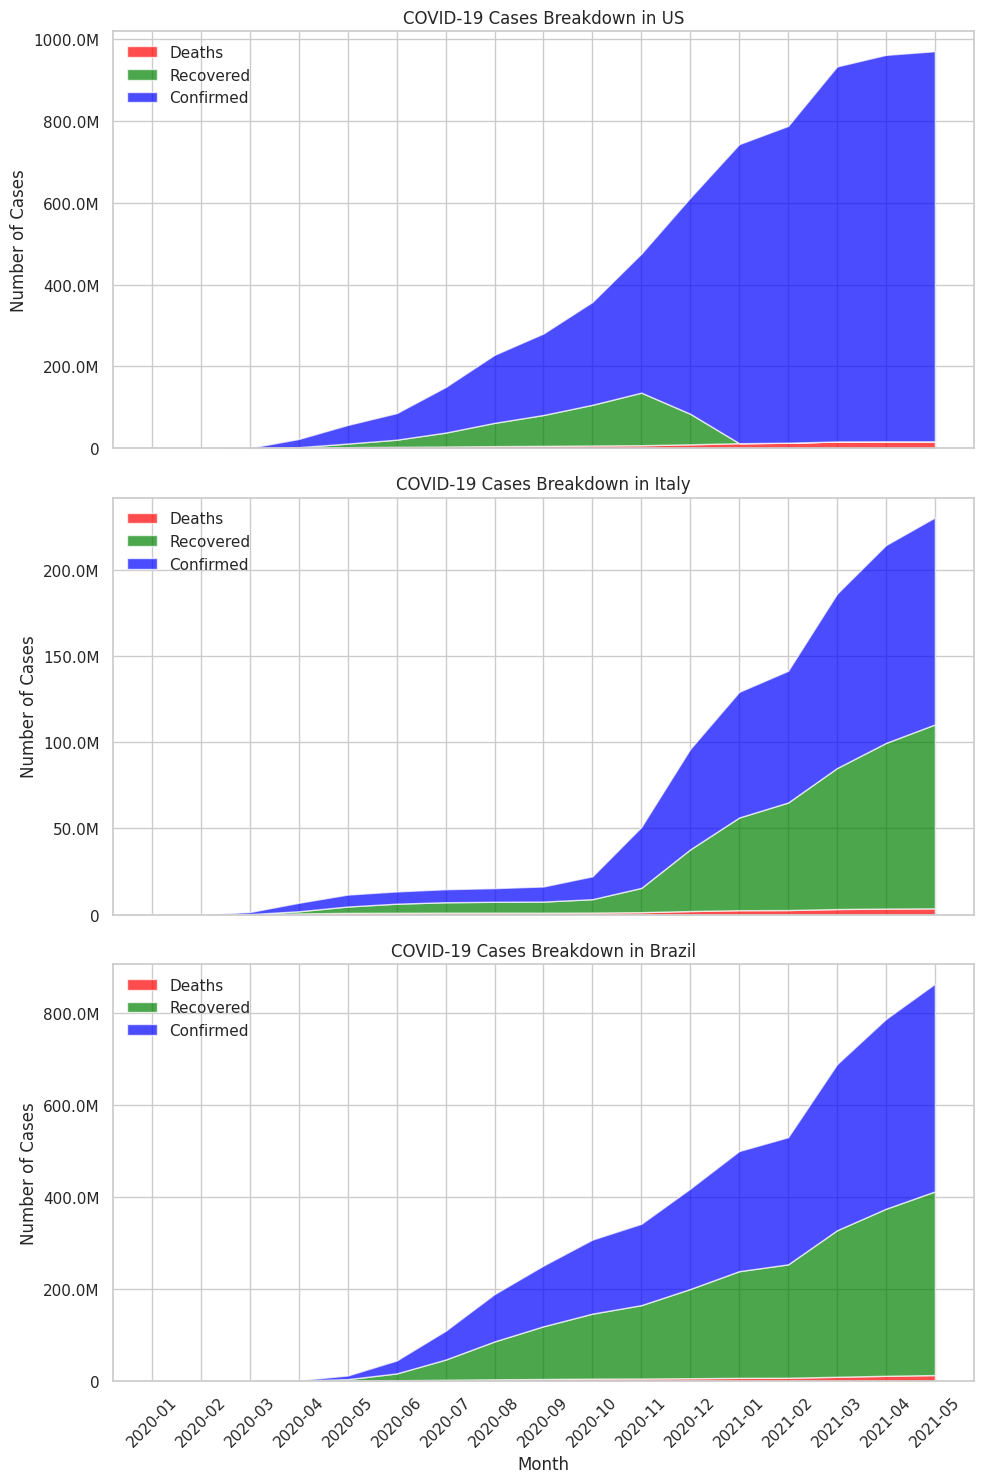

In [16]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

monthly_data['Month'] = monthly_data['Month'].astype(str)
sns.set(style="whitegrid")

#List of countries
countries = ['US', 'Italy', 'Brazil']

#Creating 3 plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)

#Plot for each country
for i, country in enumerate(countries):

    country_data = monthly_data[monthly_data['Country/Region'] == country]

    #Creating Stackedplot
    axes[i].stackplot(country_data['Month'],
                     country_data['Deaths'],
                     country_data['Recovered'],
                     country_data['Confirmed'],
                     labels=['Deaths', 'Recovered', 'Confirmed'],
                     colors=['red', 'green', 'blue'],
                     alpha=0.7)

    #Title and labels
    axes[i].set_title(f'COVID-19 Cases Breakdown in {country}')
    axes[i].set_ylabel('Number of Cases')
    axes[i].legend(loc='upper left')


    axes[i].tick_params(axis='x', rotation=45)

    # Formatting y axis
    def format_func(value, tick_number):
        if value >= 1e6:
            return f'{value/1e6:.1f}M'
        elif value >= 1e3:
            return f'{value/1e3:.0f}K'
        else:
            return f'{value:.0f}'

    axes[i].yaxis.set_major_formatter(FuncFormatter(format_func))


axes[-1].set_xlabel('Month')
plt.tight_layout()
plt.show()

# Question 8: Combined Data Analysis

Q8.1: For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?

In [17]:
#Created a copy for the data of 2020

data_2020 = merged[merged['Date'].dt.year == 2020].copy()

#filling in the missing Data.
data_2020['Confirmed'] = data_2020['Confirmed'].replace(0, pd.NA)
data_2020['Death Rate'] = data_2020['Deaths'] / data_2020['Confirmed']
data_2020['Death Rate'] = data_2020['Death Rate'].fillna(0)


#Found the mean and then identified the 3 with highst death rate
avg_death_rate = data_2020.groupby('Country/Region')['Death Rate'].mean()
top_3_death_rate = avg_death_rate.nlargest(3)
display(top_3_death_rate)

print("High death rates may indicate severe impacts due to limited healthcare capacity or higher vulnerability.")

,Death Rate
Country/Region,
United Kingdom,176.535412
France,91.511113
Netherlands,22.200475


High death rates may indicate severe impacts due to limited healthcare capacity or higher vulnerability.


Q8.2: Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?

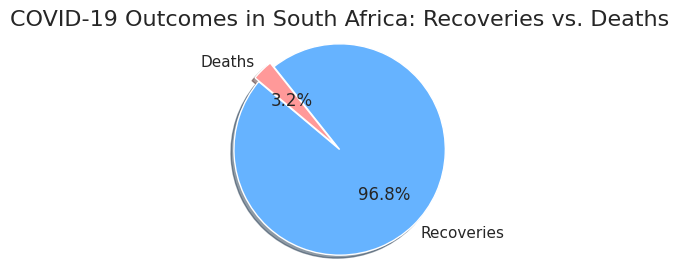

Total recoveries: 310,037,573.0
Total deaths: 10,250,036.0
Higher recoveries suggest effective case management or milder cases.


In [19]:
#Separating SA data and summing recovered and deaths
sa_data = merged[merged['Country/Region'] == 'South Africa']
total_recoveries = sa_data['Recovered'].sum()
total_deaths = sa_data['Deaths'].sum()

#Pie chart
labels = ['Recoveries', 'Deaths']
sizes = [total_recoveries, total_deaths]
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0)

plt.figure(figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('COVID-19 Outcomes in South Africa: Recoveries vs. Deaths', fontsize=16)
plt.axis('equal')
plt.show()

print(f"Total recoveries: {total_recoveries:,}")
print(f"Total deaths: {total_deaths:,}")
print("Higher recoveries suggest effective case management or milder cases.")

Q8.3: Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?
________________________________________________________________________________


Highest recovery ratio in 2020-10 with 39.58%
Possible reason: Improved treatments or increased testing.


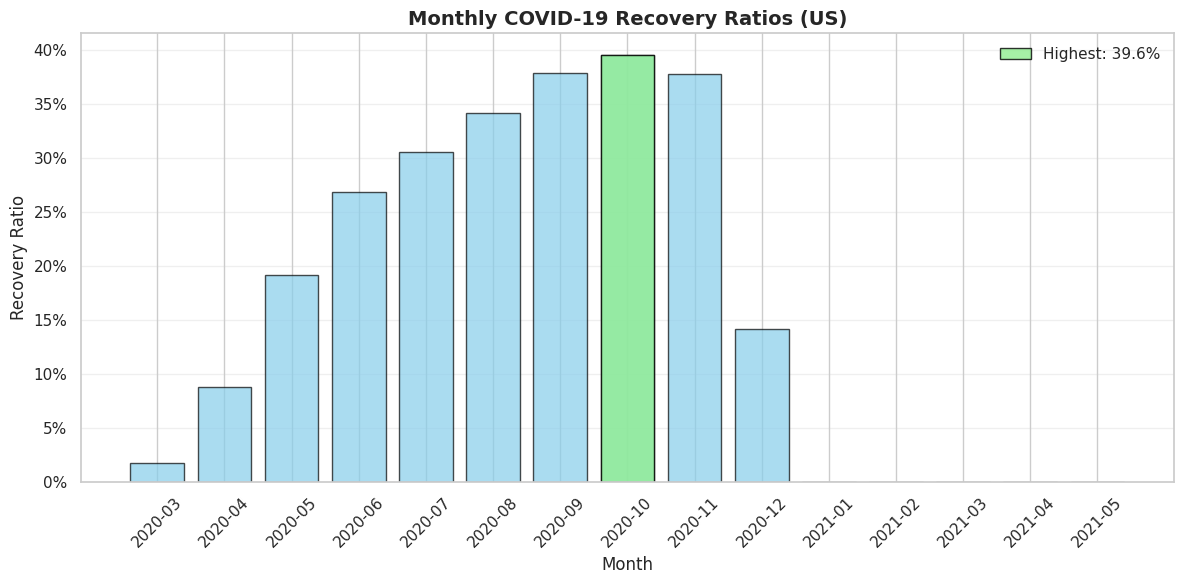

In [20]:
#Filtering for US data and specific date range
us_data = merged.loc[(merged['Country/Region'] == 'US') &
                      (merged['Date'] >= '2020-03-01') &
                      (merged['Date'] <= '2021-05-31')].copy() # .copy() here is key for the SettingWithCopyWarning

# Add 'Month' column
us_data['Month'] = us_data['Date'].dt.to_period('M')

#Grouping data by month and summing up
monthly_us = us_data.groupby('Month')[['Confirmed', 'Deaths', 'Recovered']].sum()

#Calculate Recovery Ratio
monthly_us['Recovery Ratio'] = monthly_us['Recovered'] / monthly_us['Confirmed']

#Find the month with highest recovery ratio
highest_ratio_month = monthly_us['Recovery Ratio'].idxmax()
highest_ratio_value = monthly_us['Recovery Ratio'].max()

print(f"Highest recovery ratio in {highest_ratio_month} with {highest_ratio_value:.2%}")
print("Possible reason: Improved treatments or increased testing.")

#Plotting the graph
plt.figure(figsize=(12, 6))
months = monthly_us.index.astype(str)
ratios = monthly_us['Recovery Ratio']

plt.bar(months, ratios, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Monthly COVID-19 Recovery Ratios (US)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Recovery Ratio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

#Formatting y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

#Highlighting the highest ratio month
max_idx = ratios.idxmax()
max_value = ratios.max()
plt.bar(str(max_idx), max_value, color='lightgreen', edgecolor='black', alpha=0.8, label=f'Highest: {max_value:.1%}')

plt.legend()
plt.tight_layout()
plt.show()
